In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data files from Github
deaths_url = "https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv"
cases_url = "https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv"
linelistdeath_url = 'https://raw.githubusercontent.com/khoocheeshin/HIAGroupProject/refs/heads/main/linelist_deaths.csv'
genderpopulation_url = 'https://raw.githubusercontent.com/khoocheeshin/HIAGroupProject/refs/heads/main/GenderPopulationByYear.csv'
agepopulation_url = 'https://raw.githubusercontent.com/khoocheeshin/HIAGroupProject/refs/heads/main/AgePopulationByYear.csv'

# Load the data files into dataframes
deaths_data = pd.read_csv(deaths_url)
cases_data = pd.read_csv(cases_url)
linelist_deaths = pd.read_csv(linelistdeath_url)
genderpopulation = pd.read_csv(genderpopulation_url)
age_population = pd.read_csv(agepopulation_url)

# Define datasets in a dictionary for structured processing
datasets = {
    "Deaths Data": deaths_data,
    "Cases Data": cases_data,
    "Linelist Deaths Data": linelist_deaths,
    "Gender Population Data": genderpopulation,
    "Age Population Data": age_population
}

# Display the first few rows of each dataset
print("Dataset Overviews:")
for name, df in datasets.items():
    print(f"\n{name} Overview:")
    print(df.head())

# Display dataset info
print("\nDataset Info:")
for name, df in datasets.items():
    print(f"\n{name} Info:")
    print(df.info())

# Check for missing values in each dataset
print("\nMissing Values in Datasets:")
for name, df in datasets.items():
    print(f"\n{name} Missing Values:")
    print(df.isnull().sum())

# Check for duplicates in each dataset
print("\nDuplicates in Datasets:")
for name, df in datasets.items():
    print(f"\n{name} Duplicates:")
    print(df.duplicated().sum())

Dataset Overviews:

Deaths Data Overview:
         date  deaths_new  deaths_bid  deaths_new_dod  deaths_bid_dod  \
0  2020-03-17           2           0               2               0   
1  2020-03-18           0           0               0               0   
2  2020-03-19           0           0               0               0   
3  2020-03-20           1           0               1               0   
4  2020-03-21           4           0               4               0   

   deaths_unvax  deaths_pvax  deaths_fvax  deaths_boost  deaths_tat  
0             2            0            0             0           0  
1             0            0            0             0           0  
2             0            0            0             0           0  
3             1            0            0             0           0  
4             4            0            0             0           0  

Cases Data Overview:
         date  cases_new  cases_import  cases_recovered  cases_active  \
0  2

In [12]:
# Define Date Range and Variant Periods
date_range = ('2021-04-01', '2024-11-30')
delta_period = ('2021-04-01', '2022-01-31')
omicron_period = ('2022-02-01', '2024-11-30')

# Convert to datetime
start_date, end_date = pd.to_datetime(date_range)
delta_start, delta_end = pd.to_datetime(delta_period)
omicron_start, omicron_end = pd.to_datetime(omicron_period)

# Convert 'date' column to datetime format and filter relevant date range
deaths_data['date'] = pd.to_datetime(deaths_data['date'])
cases_data['date'] = pd.to_datetime(cases_data['date'])
linelist_deaths['date_announced'] = pd.to_datetime(linelist_deaths['date_announced'])

filtered_deaths_data = deaths_data[
    (deaths_data['date'] >= start_date) & (deaths_data['date'] <= end_date)
]
filtered_cases_data = cases_data[
    (cases_data['date'] >= start_date) & (cases_data['date'] <= end_date)
]
filtered_linelist = linelist_deaths[
    (linelist_deaths['date_announced'] >= start_date) & (linelist_deaths['date_announced'] <= end_date)]
                                       
# Check for missing values
null_counts = filtered_deaths_data.isna().sum()
print("Number of missing values in each column:\n", null_counts)
null_counts = filtered_cases_data.isna().sum()
print("Number of missing values in each column:\n", null_counts)
null_counts = filtered_linelist.isna().sum()
print("Number of missing values in each column:\n", null_counts)

Number of missing values in each column:
 date              0
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_unvax      0
deaths_pvax       0
deaths_fvax       0
deaths_boost      0
deaths_tat        0
dtype: int64
Number of missing values in each column:
 date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79          

In [13]:
## Mortality Trends and CFR
# Aggregate daily deaths and cases to monthly totals
filtered_deaths_data.loc[:,'year_month'] = filtered_deaths_data['date'].dt.to_period('M')
filtered_cases_data.loc[:,'year_month'] = filtered_cases_data['date'].dt.to_period('M')

monthly_deaths = filtered_deaths_data.groupby('year_month')['deaths_new'].sum().reset_index()
monthly_cases = filtered_cases_data.groupby('year_month')['cases_new'].sum().reset_index()

# Merge monthly deaths and cases data
monthly_data = pd.merge(monthly_deaths, monthly_cases, on='year_month')

# Calculate Case Fatality Rate (CFR)
monthly_data['CFR'] = (monthly_data['deaths_new'] / monthly_data['cases_new']) * 100

# Calculate cumulative deaths
monthly_data['cumulative_deaths'] = monthly_data['deaths_new'].cumsum()

# Check for missing values after transformation
nan_counts = monthly_data.isnull().sum()
print("Number of missing values in each column after transform:\n", nan_counts)

# Save processed data to CSV
monthly_data.to_csv('monthly_deaths_data.csv', index=False)

# Display processed data file
monthly_data

Number of missing values in each column after transform:
 year_month           0
deaths_new           0
cases_new            0
CFR                  0
cumulative_deaths    0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_10236\4151191666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deaths_data.loc[:,'year_month'] = filtered_deaths_data['date'].dt.to_period('M')
C:\Users\User\AppData\Local\Temp\ipykernel_10236\4151191666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cases_data.loc[:,'year_month'] = filtered_cases_data['date'].dt.to_period('M')


,year_month,deaths_new,cases_new,CFR,cumulative_deaths
0,2021-04,234,63213,0.370177,234
1,2021-05,1290,163644,0.788297,1524
2,2021-06,2374,179622,1.321664,3898
3,2021-07,3854,361293,1.066724,7752
4,2021-08,7639,632982,1.206827,15391
5,2021-09,9669,499441,1.935964,25060
6,2021-10,2577,225947,1.140533,27637
7,2021-11,1515,161140,0.940176,29152
8,2021-12,1063,125304,0.848337,30215
9,2022-01,491,112672,0.435778,30706


In [14]:
## Vaccination Status
# Extract the specified columns: deaths_unvax, deaths_pvax, deaths_boost, and year_month
deaths_vax_status = filtered_deaths_data.loc[:, ['year_month', 'deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']]

# Group by 'year_month' and sum the deaths for each group
deaths_vax_status = deaths_vax_status.groupby('year_month').sum().reset_index() 
# Verify the new DataFrame 
deaths_vax_status.head()

# Check for missing values after transformation
nan_counts = deaths_vax_status.isnull().sum()
print("Number of missing values in each column after transform:\n", nan_counts)

# Save processed data to CSV
deaths_vax_status.to_csv('deaths_vaccination_status.csv', index=False)

# Display processed data file
deaths_vax_status

Number of missing values in each column after transform:
 year_month      0
deaths_unvax    0
deaths_pvax     0
deaths_fvax     0
deaths_boost    0
dtype: int64


,year_month,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost
0,2021-04,258,0,0,0
1,2021-05,1546,74,0,0
2,2021-06,2266,231,5,0
3,2021-07,4661,1846,168,0
4,2021-08,5532,2570,770,0
5,2021-09,3161,1179,1217,0
6,2021-10,1089,200,1077,0
7,2021-11,524,55,801,14
8,2021-12,363,30,576,10
9,2022-01,167,11,232,25


In [15]:
## Demographic Deaths
# Extract interested columns into a new DataFrame
death_demographic = filtered_linelist.loc[:, ['date_announced', 'age', 'male', 'comorb']]

# Extract year and create 'Year-Month' column
death_demographic['year'] = death_demographic['date_announced'].dt.year
death_demographic['year_month'] = death_demographic['date_announced'].dt.to_period('M')

# Define and apply function to assign age groups
def assign_age_group(age):
    if age <= 9:
        return '0-9'
    elif 10 <= age <= 19:
        return '10-19'
    elif 20 <= age <= 59:
        return '20-59'
    elif age >= 60:
        return '60+'
    else:
        return np.nan

death_demographic['age_group'] = death_demographic['age'].apply(assign_age_group)

# Check for missing values after transformation
nan_counts = death_demographic.isnull().sum()
print("Number of missing values in each column after transform:\n", nan_counts)

# Save processed data to CSV
death_demographic.to_csv('death_demographic.csv', index=False)

# Display processed data file
death_demographic

Number of missing values in each column after transform:
 date_announced    0
age               0
male              0
comorb            0
year              0
year_month        0
age_group         0
dtype: int64


,date_announced,age,male,comorb,year,year_month,age_group
1272,2021-04-01,68,1,1,2021,2021-04,60+
1273,2021-04-01,60,1,1,2021,2021-04,60+
1274,2021-04-01,81,0,0,2021,2021-04,60+
1275,2021-04-01,54,1,1,2021,2021-04,20-59
1276,2021-04-01,73,0,1,2021,2021-04,60+
...,...,...,...,...,...,...,...
37346,2024-02-01,19,1,1,2024,2024-02,10-19
37347,2024-02-29,76,1,0,2024,2024-02,60+
37348,2024-04-05,81,0,0,2024,2024-04,60+
37349,2024-04-24,46,0,1,2024,2024-04,20-59


Descriptive Statistics for Monthly Deaths:
 count      44.000000
mean      819.977273
std      1934.672035
min         0.000000
25%         7.250000
50%        89.000000
75%       509.250000
max      9669.000000
Name: deaths_new, dtype: float64
Descriptive Statistics for Monthly Cases:
 count        44.000000
mean     113148.704545
std      180957.141226
min        2286.000000
25%        5516.500000
50%       38261.000000
75%      116824.500000
max      759183.000000
Name: cases_new, dtype: float64
Descriptive Statistics for Monthly CFR:
 count    44.000000
mean      0.370580
std       0.433641
min       0.000000
25%       0.097529
50%       0.231742
75%       0.386577
max       1.935964
Name: CFR, dtype: float64


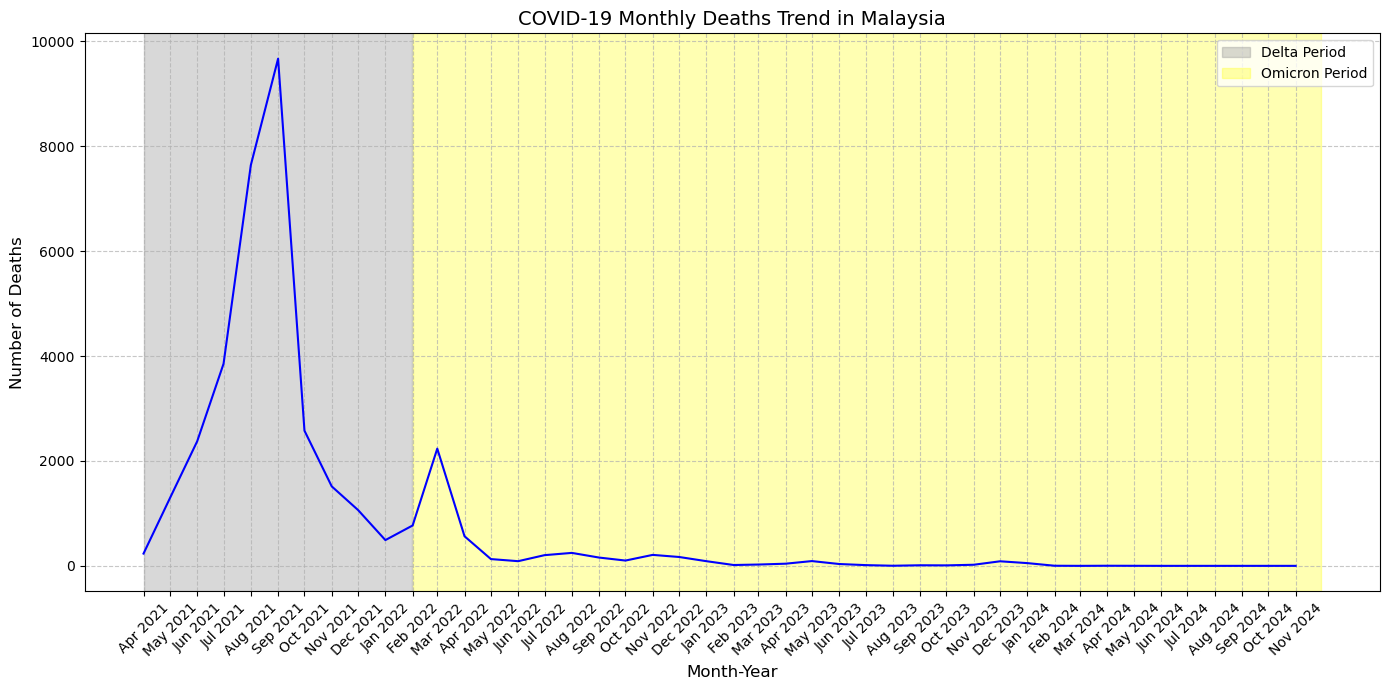

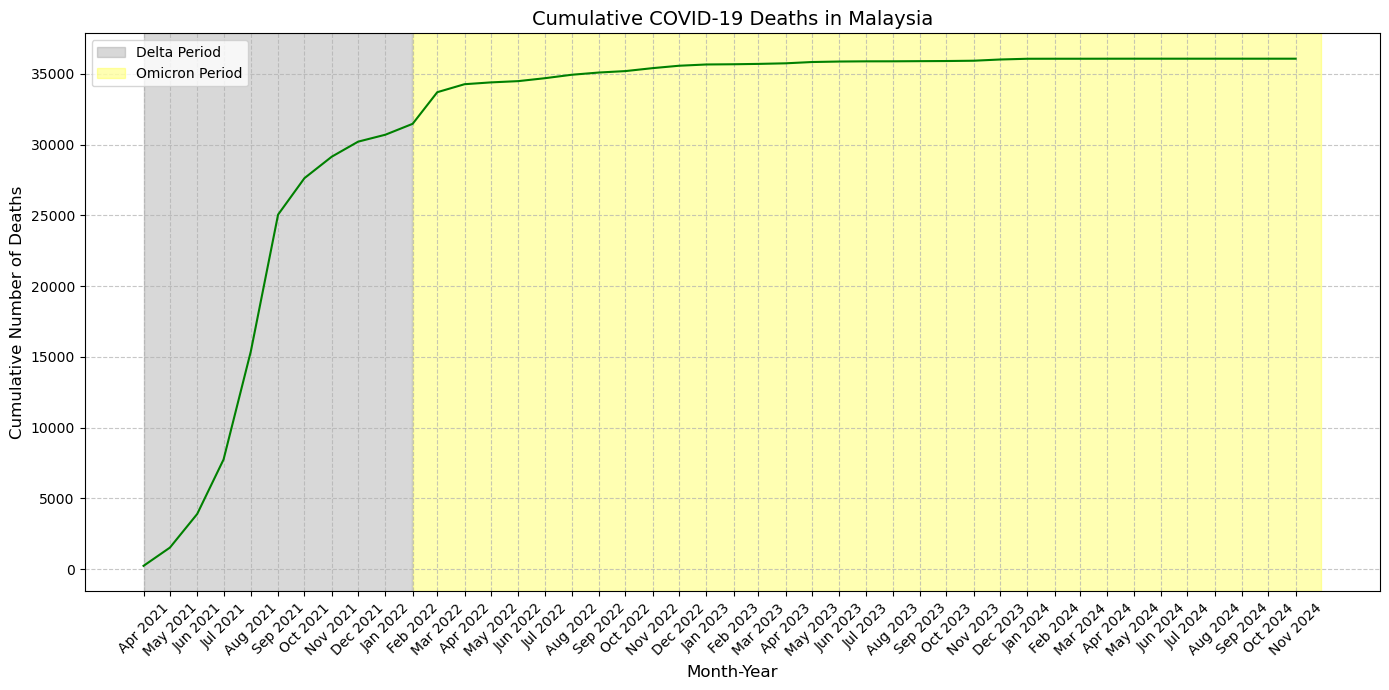

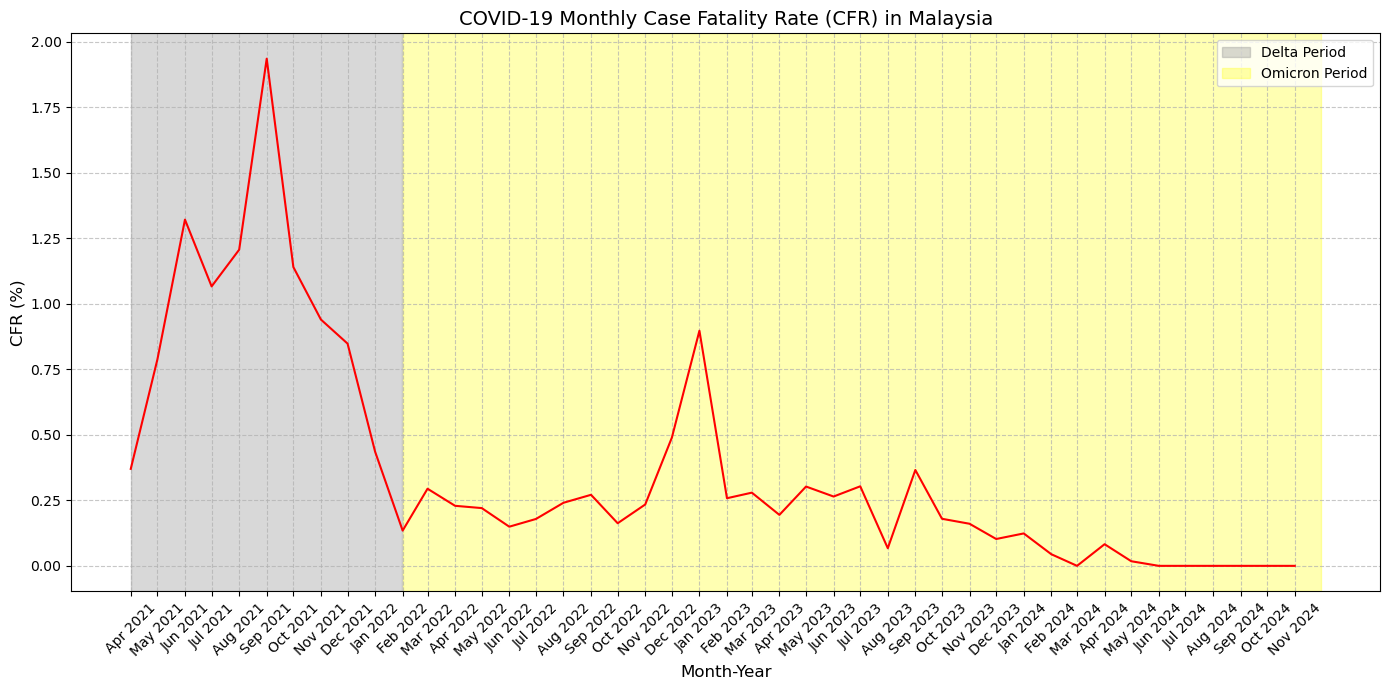

In [16]:
# Descriptive Statistics for Mortarlity Trends
print("Descriptive Statistics for Monthly Deaths:\n", monthly_data['deaths_new'].describe()) 
print("Descriptive Statistics for Monthly Cases:\n", monthly_data['cases_new'].describe()) 
print("Descriptive Statistics for Monthly CFR:\n", monthly_data['CFR'].describe())

# Ensure 'year_month' is a period type 
monthly_data['year_month'] = monthly_data['year_month'].astype('period[M]') 
# Convert 'year_month' to timestamp for plotting 
monthly_data['year_month'] = monthly_data['year_month'].dt.to_timestamp()

# Plot: COVID-19 Monthly Deaths Trend in Malaysia
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['year_month'], monthly_data['deaths_new'], color='blue')
# Highlight Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')
plt.title('COVID-19 Monthly Deaths Trend in Malaysia', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(monthly_data['year_month'], monthly_data['year_month'].dt.strftime('%b %Y'), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot: Cumulative COVID-19 Deaths in Malaysia
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['year_month'], monthly_data['cumulative_deaths'], color='green')
# Highlight Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')
plt.title('Cumulative COVID-19 Deaths in Malaysia', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Cumulative Number of Deaths', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(monthly_data['year_month'], monthly_data['year_month'].dt.strftime('%b %Y'), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot: Case Fatality Rate (CFR) Trend
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['year_month'], monthly_data['CFR'], color='red')
# Highlight Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')
plt.title('COVID-19 Monthly Case Fatality Rate (CFR) in Malaysia', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('CFR (%)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(monthly_data['year_month'], monthly_data['year_month'].dt.strftime('%b %Y'), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Descriptive Statistics for Unvaccinated Status:
 count      44.000000
mean      481.431818
std      1200.037158
min         0.000000
25%         0.750000
50%        18.000000
75%       189.750000
max      5532.000000
Name: deaths_unvax, dtype: float64
Descriptive Statistics for Partial Vaccinated Status:
 count      44.00000
mean      143.50000
std       496.57499
min         0.00000
25%         0.00000
50%         1.00000
75%        11.50000
max      2570.00000
Name: deaths_pvax, dtype: float64
Descriptive Statistics for Fully Vaccinated Status:
 count      44.000000
mean      159.090909
std       319.569392
min         0.000000
25%         0.750000
50%         8.000000
75%        77.500000
max      1217.000000
Name: deaths_fvax, dtype: float64
Descriptive Statistics for Booster Vaccinated Status:
 count     44.000000
mean      34.022727
std       73.432611
min        0.000000
25%        0.000000
50%       10.000000
75%       42.500000
max      456.000000
Name: deaths_boost, dtype: fl

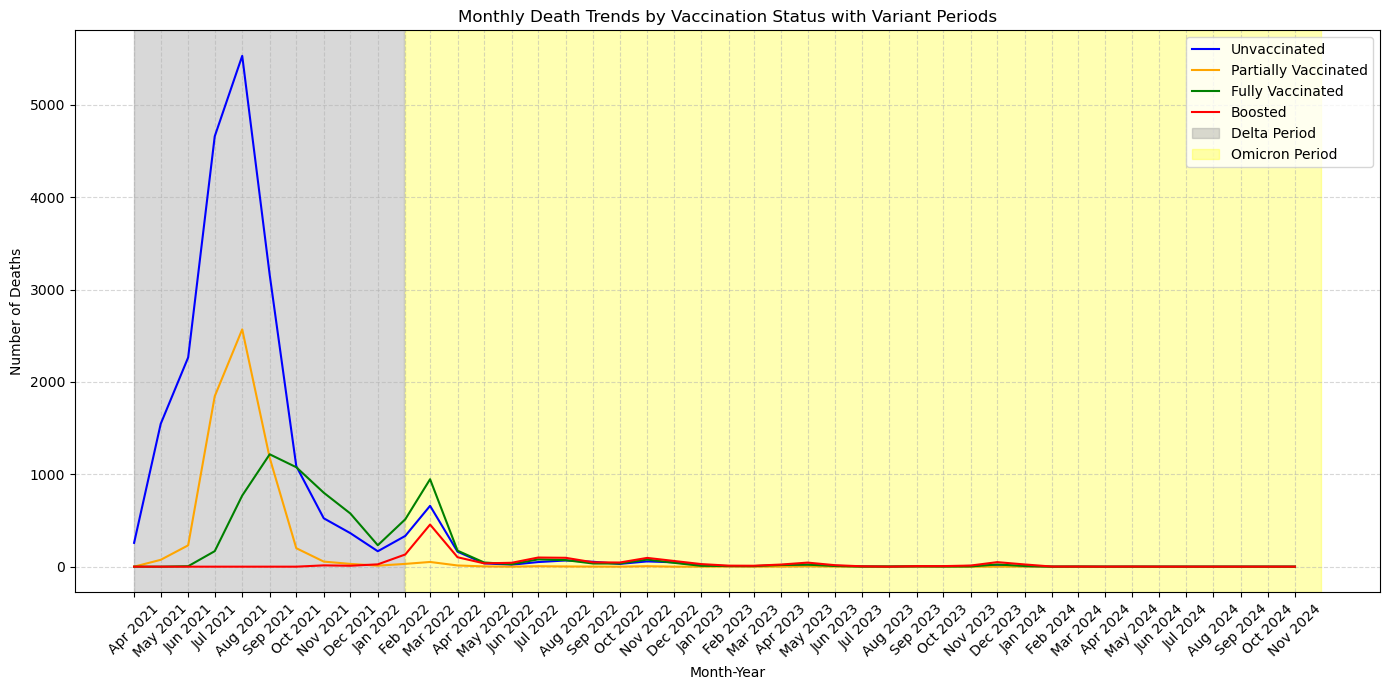

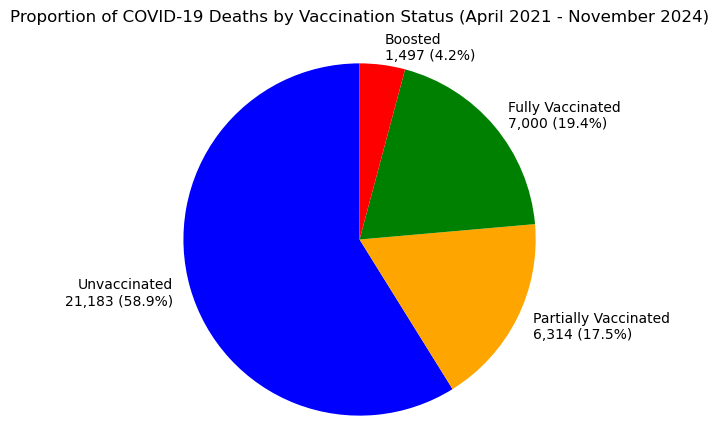

In [17]:
# Descriptive Statistics for Vaccination Status
print("Descriptive Statistics for Unvaccinated Status:\n", deaths_vax_status['deaths_unvax'].describe()) 
print("Descriptive Statistics for Partial Vaccinated Status:\n", deaths_vax_status['deaths_pvax'].describe()) 
print("Descriptive Statistics for Fully Vaccinated Status:\n", deaths_vax_status['deaths_fvax'].describe()) 
print("Descriptive Statistics for Booster Vaccinated Status:\n", deaths_vax_status['deaths_boost'].describe()) 

# Ensure 'year_month' is a period type 
deaths_vax_status['year_month'] = deaths_vax_status['year_month'].astype('period[M]') 
# Convert 'year_month' to timestamp for plotting 
deaths_vax_status['year_month'] = deaths_vax_status['year_month'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
plt.plot(deaths_vax_status['year_month'], deaths_vax_status['deaths_unvax'], label='Unvaccinated', color='blue')
plt.plot(deaths_vax_status['year_month'], deaths_vax_status['deaths_pvax'], label='Partially Vaccinated', color='orange')
plt.plot(deaths_vax_status['year_month'], deaths_vax_status['deaths_fvax'], label='Fully Vaccinated', color='green')
plt.plot(deaths_vax_status['year_month'], deaths_vax_status['deaths_boost'], label='Boosted', color='red')
# Highlight Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')
plt.title('Monthly Death Trends by Vaccination Status with Variant Periods')
plt.xlabel('Month-Year')
plt.ylabel('Number of Deaths')
plt.legend(fontsize=10)
plt.xticks(deaths_vax_status['year_month'], deaths_vax_status['year_month'].dt.strftime('%b %Y'), rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Aggregate total deaths by vaccination status
total_deaths_by_vax_status = deaths_vax_status[
    ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']
].sum()
total_deaths_by_vax_status.columns = ['Vaccination Status', 'Total Deaths']

# Calculate percentages for the pie chart
total_deaths_percent = (total_deaths_by_vax_status / total_deaths_by_vax_status.sum()) * 100

# Prepare data for the pie chart
labels = ['Unvaccinated', 'Partially Vaccinated', 'Fully Vaccinated', 'Boosted']
sizes = total_deaths_by_vax_status.values
percentages = total_deaths_percent.values

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=[f"{label}\n{int(size):,} ({percent:.1f}%)" for label, size, percent in zip(labels, sizes, percentages)],
    startangle=90,
    colors=['blue', 'orange', 'green', 'red']
)
plt.title('Proportion of COVID-19 Deaths by Vaccination Status (April 2021 - November 2024)\n')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

Descriptive Statistics for Age:
 count    36079.000000
mean        62.623909
std         16.639383
min          0.000000
25%         51.000000
50%         64.000000
75%         75.000000
max        130.000000
Name: age, dtype: float64


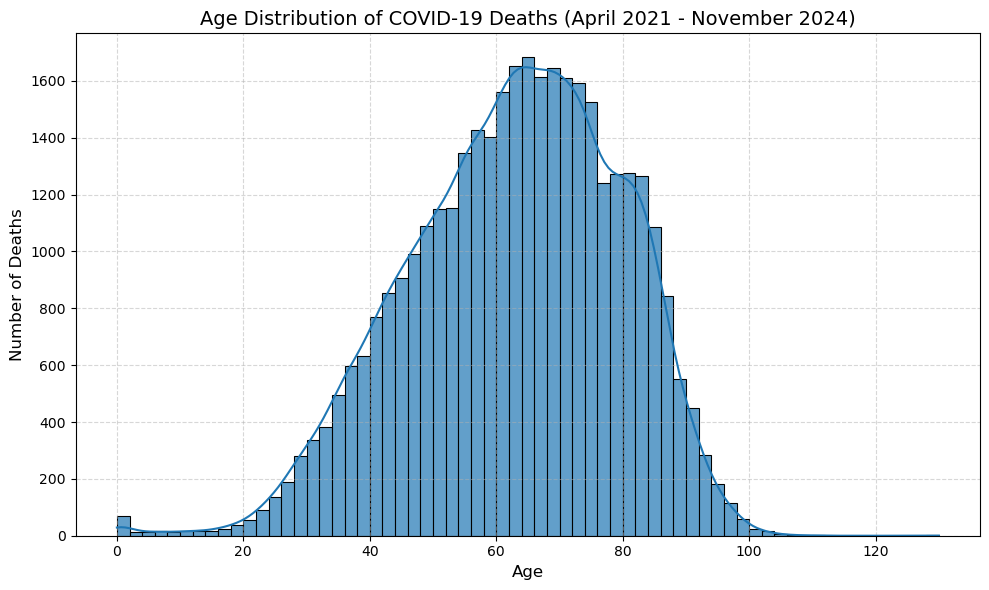


Total Number of Deaths by Age Group:
   age_group  Total Deaths  Percentage
0       0-9           121    0.335375
1     10-19           115    0.318745
2     20-59         14284   39.590898
3       60+         21559   59.754982


In [18]:
# Descriptive Statistics for Age
print("Descriptive Statistics for Age:\n", death_demographic['age'].describe())

# Distribution of ages 
plt.figure(figsize=(10, 6))
sns.histplot(death_demographic['age'], bins=65, edgecolor='black', alpha=0.7, kde=True)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Age Distribution of COVID-19 Deaths (April 2021 - November 2024)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculate total number of deaths by age groups
age_total = death_demographic.groupby('age_group').size().reset_index(name='Total Deaths')
# Calculate the percentage of deaths by age groups
total_deaths = age_total['Total Deaths'].sum()  # Sum of all deaths
age_total['Percentage'] = (age_total['Total Deaths'] / total_deaths) * 100

# Display the results
print("\nTotal Number of Deaths by Age Group:\n", age_total)

# Save the summary table to a CSV file 
age_total.to_csv('age_group_total_deaths.csv', index=False)

Monthly deaths age group:
     year_month age_group  Deaths  year
0      2021-04     20-59      71  2021
1      2021-04       60+     163  2021
2      2021-05       0-9       1  2021
3      2021-05     10-19       3  2021
4      2021-05     20-59     331  2021
..         ...       ...     ...   ...
141    2024-11     20-59       0  2024
142    2024-11     10-19       0  2024
143    2024-11       0-9       0  2024
144    2021-04       0-9       0  2021
145    2021-04     10-19       0  2021

[146 rows x 4 columns]
Columns in age_population: Index(['year', 'total_pop', 'pop_4', 'pop_9', 'pop_14', 'pop_19', 'pop_24',
       'pop_29', 'pop_34', 'pop_39', 'pop_44', 'pop_49', 'pop_54', 'pop_59',
       'pop_64', 'pop_69', 'pop_74', 'pop_79', 'pop_84', 'pop_85+'],
      dtype='object')
Columns in aggregated_population: Index(['year', 'age_group', 'population'], dtype='object')
Merged age data:
     year_month age_group  Deaths  year  population  Death Rate (per 100000)
0      2021-04     20-5

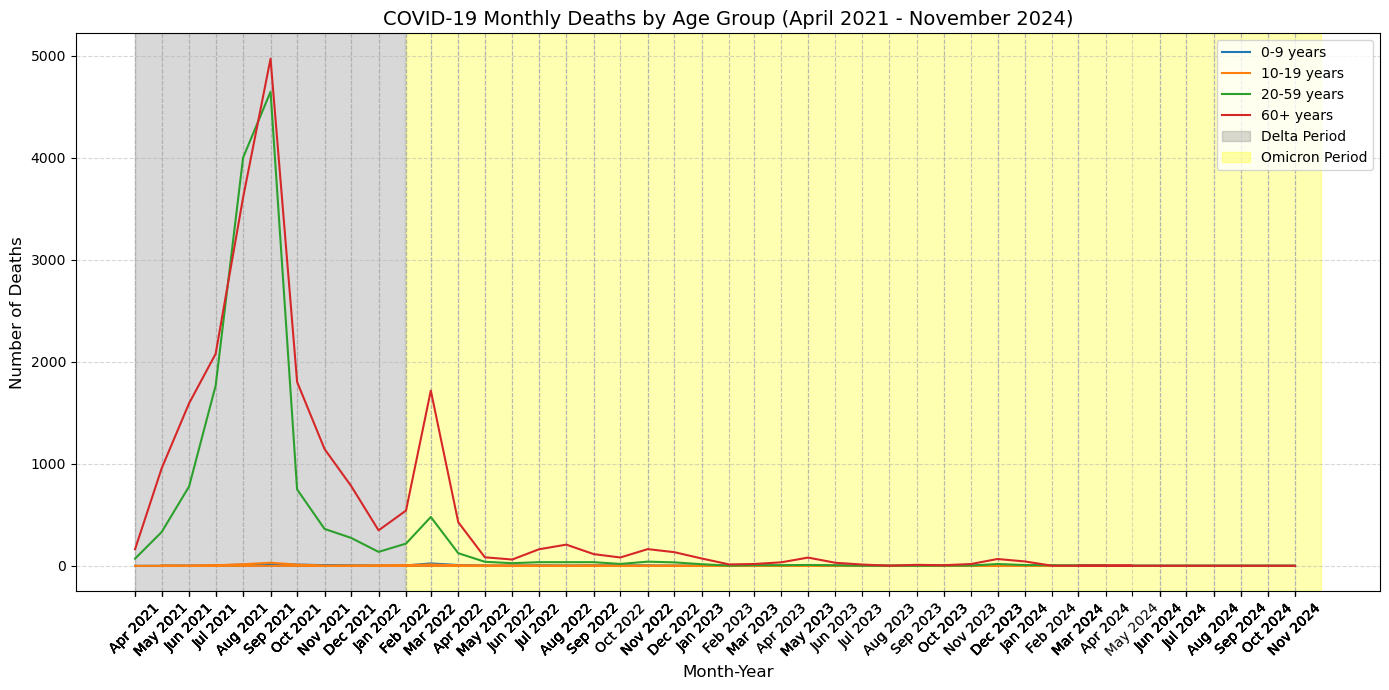

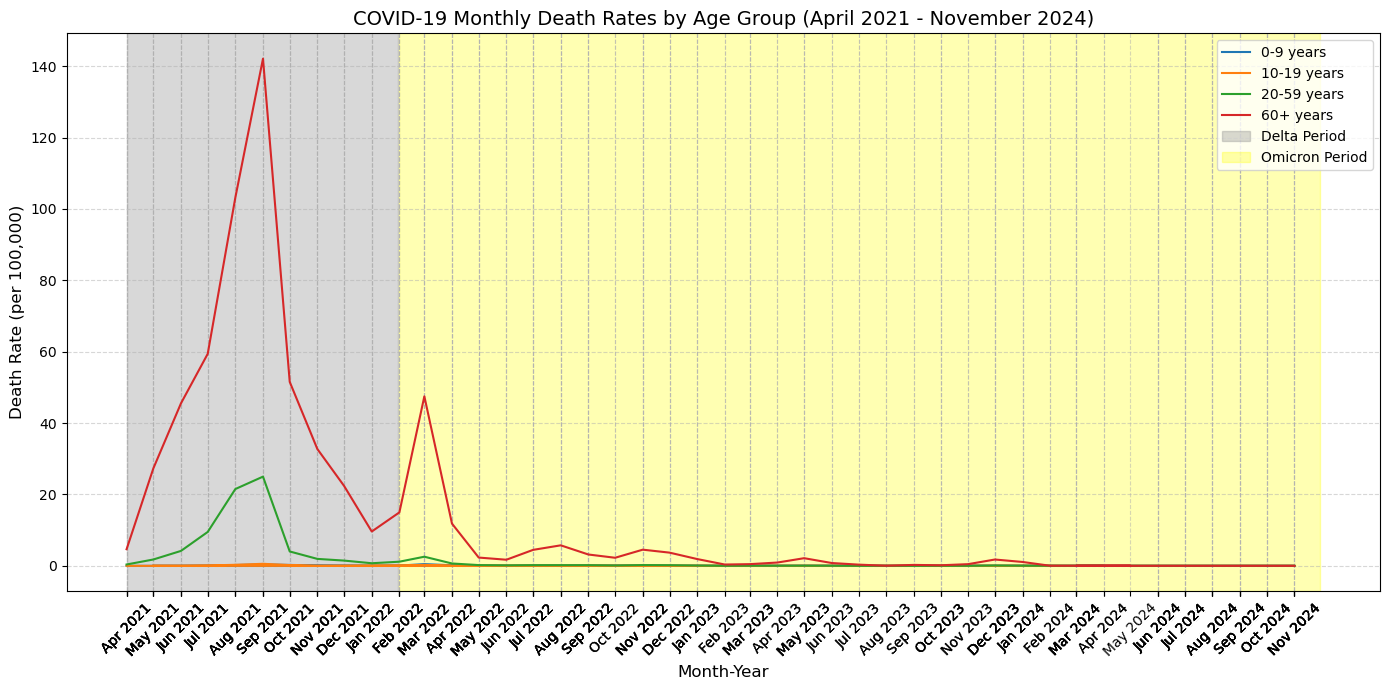

In [19]:
# Group data by 'year_month' and 'age_group', and count the number of deaths in each group
age_monthly_deaths = (
    death_demographic.groupby(['year_month', 'age_group'])
    .size()
    .reset_index(name='Deaths')
)

# Define missing months and add them to the DataFrame
missing_months = ['2024-03', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11']
age_groups = death_demographic['age_group'].unique()

missing_months_data = [{'year_month': pd.Period(month, freq='M'), 'age_group': age_group, 'Deaths': 0} 
                        for month in missing_months for age_group in age_groups]

# Specifically add missing rows for April 2021 for age groups 0-9 and 10-19
april_2021_missing = [{'year_month': pd.Period('2021-04', freq='M'), 'age_group': age_group, 'Deaths': 0} 
                       for age_group in ['0-9', '10-19']]

# Combine missing months data
missing_months_data += april_2021_missing
missing_months_df = pd.DataFrame(missing_months_data)

# Ensure consistent 'year_month' format and merge
age_monthly_deaths['year_month'] = age_monthly_deaths['year_month'].astype('period[M]')
missing_months_df['year_month'] = missing_months_df['year_month'].astype('period[M]')
age_monthly_deaths = pd.concat([age_monthly_deaths, missing_months_df], ignore_index=True)

# Extract the year from 'year_month'
age_monthly_deaths['year'] = age_monthly_deaths['year_month'].dt.year
# Display updated DataFrame
print("Monthly deaths age group:\n", age_monthly_deaths)

# Verify column names in age_population before aggregation 
print("Columns in age_population:", age_population.columns)

# Aggregated age groups population data
age_population['0-9'] = age_population['pop_4'] + age_population['pop_9']
age_population['10-19'] = age_population['pop_14'] + age_population['pop_19']
age_population['20-59'] = (age_population['pop_24'] + age_population['pop_29'] +
                           age_population['pop_34'] + age_population['pop_39'] +
                           age_population['pop_44'] + age_population['pop_49'] +
                           age_population['pop_54'] + age_population['pop_59'])
age_population['60+'] = (age_population['pop_64'] + age_population['pop_69'] +
                         age_population['pop_74'] + age_population['pop_79'] +
                         age_population['pop_84'] + age_population['pop_85+'])

# Keep only the relevant columns for merging
aggregated_population = age_population[['year', '0-9', '10-19', '20-59', '60+']]

# Melt the DataFrame to match the format of age_summary (long format)
aggregated_population = aggregated_population.melt(id_vars=['year'],
                                                   var_name='age_group',
                                                   value_name='population')

# Verify columns in aggregated_population before aggregation 
print("Columns in aggregated_population:", aggregated_population.columns)

# Merge the population data with death data and calculate death rates 
merged_age_data = age_monthly_deaths.merge(aggregated_population, on=['year', 'age_group'], how='left') 
merged_age_data['Death Rate (per 100000)'] = (merged_age_data['Deaths'] / merged_age_data['population']) * 100000 
merged_age_data['Death Rate (per 100000)'] = merged_age_data['Death Rate (per 100000)'].round(3)

# Check the data of merged_age_data
print("Merged age data:\n", merged_age_data)

# Save 'merged_age_data' as a CSV file for data storage
merged_age_data.to_csv('merged_age_data.csv', index=False)

# Convert 'year_month' to datetime (from Period)
merged_age_data['year_month'] = merged_age_data['year_month'].dt.to_timestamp()

# Define the desired order for age groups
age_group_order = ['0-9', '10-19', '20-59', '60+']

# Plot Monthly Death Trends by Age Group with Variant Periods
plt.figure(figsize=(14, 7))
for age_group in age_group_order:
    age_group_data = merged_age_data[merged_age_data['age_group'] == age_group]
    plt.plot(age_group_data['year_month'], age_group_data['Deaths'], label=f'{age_group} years')
# Highlight Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')
# Add labels, legend, and title
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('COVID-19 Monthly Deaths by Age Group (April 2021 - November 2024)', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(merged_age_data['year_month'], merged_age_data['year_month'].dt.strftime('%b %Y'), rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot Monthly Death Rates by Age Group with Variant Periods
plt.figure(figsize=(14, 7))
for age_group in age_group_order:
    age_group_data = merged_age_data[merged_age_data['age_group'] == age_group]
    plt.plot(age_group_data['year_month'], age_group_data['Death Rate (per 100000)'], label=f'{age_group} years')
# Highlight Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')
# Add labels, legend, and title
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Death Rate (per 100,000)', fontsize=12)
plt.title('COVID-19 Monthly Death Rates by Age Group (April 2021 - November 2024)', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(merged_age_data['year_month'], merged_age_data['year_month'].dt.strftime('%b %Y'), rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Descriptive Statistics for Gender:
 male
1    0.572826
0    0.427174
Name: proportion, dtype: float64
Total number of male deaths: 20667 (57.28%)
Total number of female deaths: 15412 (42.72%)


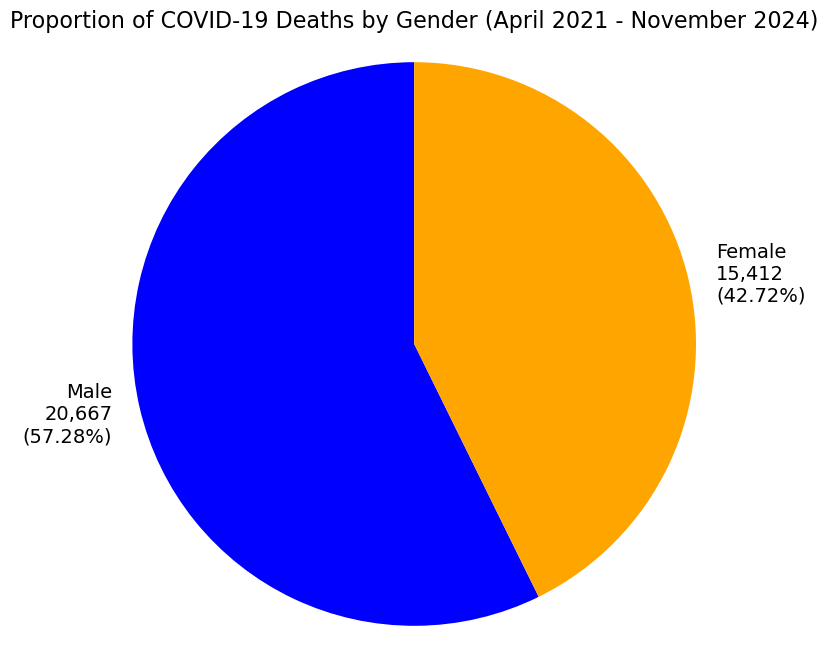

Gender monthly deaths:
    year_month  Male Deaths  Female Deaths  Total Deaths  year
0     2021-04          134            100           234  2021
1     2021-05          783            507          1290  2021
2     2021-06         1361           1013          2374  2021
3     2021-07         2197           1657          3854  2021
4     2021-08         4288           3351          7639  2021
5     2021-09         5506           4163          9669  2021
6     2021-10         1514           1063          2577  2021
7     2021-11          855            660          1515  2021
8     2021-12          618            445          1063  2021
9     2022-01          276            215           491  2022
10    2022-02          446            324           770  2022
11    2022-03         1272            963          2235  2022
12    2022-04          334            230           564  2022
13    2022-05           76             53           129  2022
14    2022-06           59             30     

C:\Users\User\AppData\Local\Temp\ipykernel_10236\3207783335.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_monthly_deaths = death_demographic.groupby('year_month').apply(


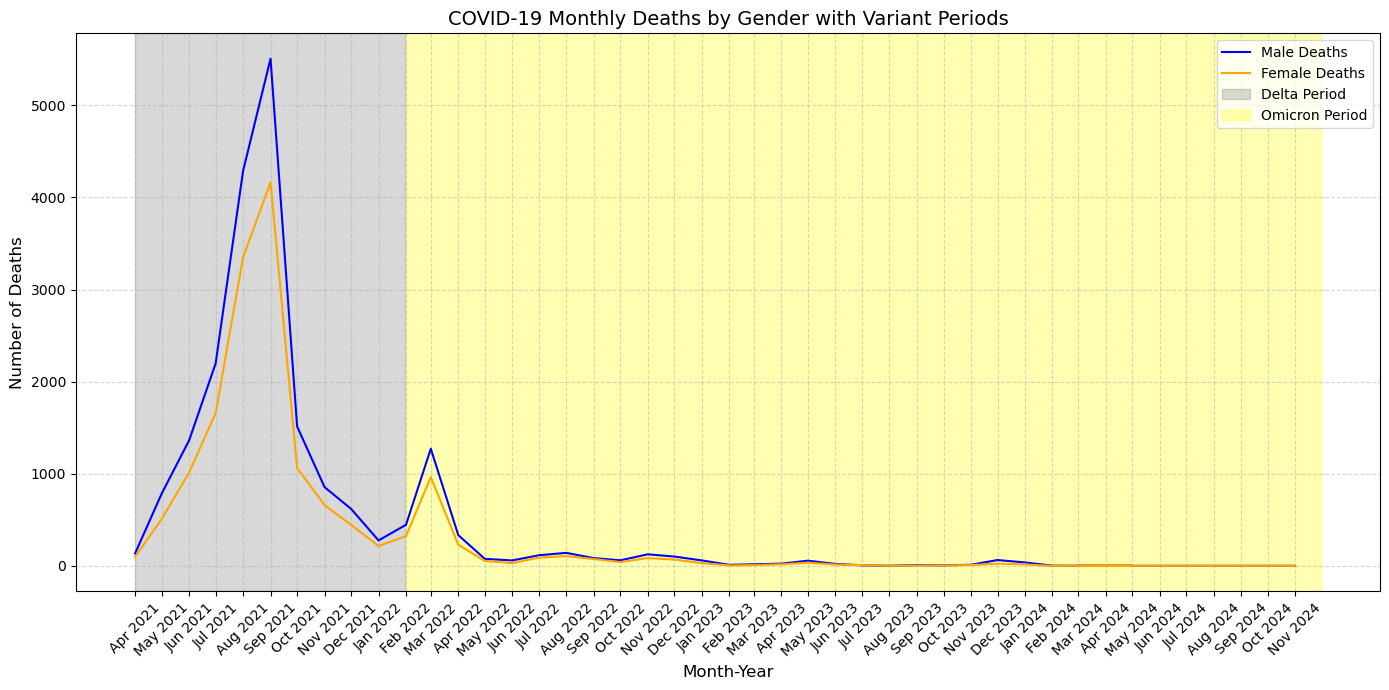

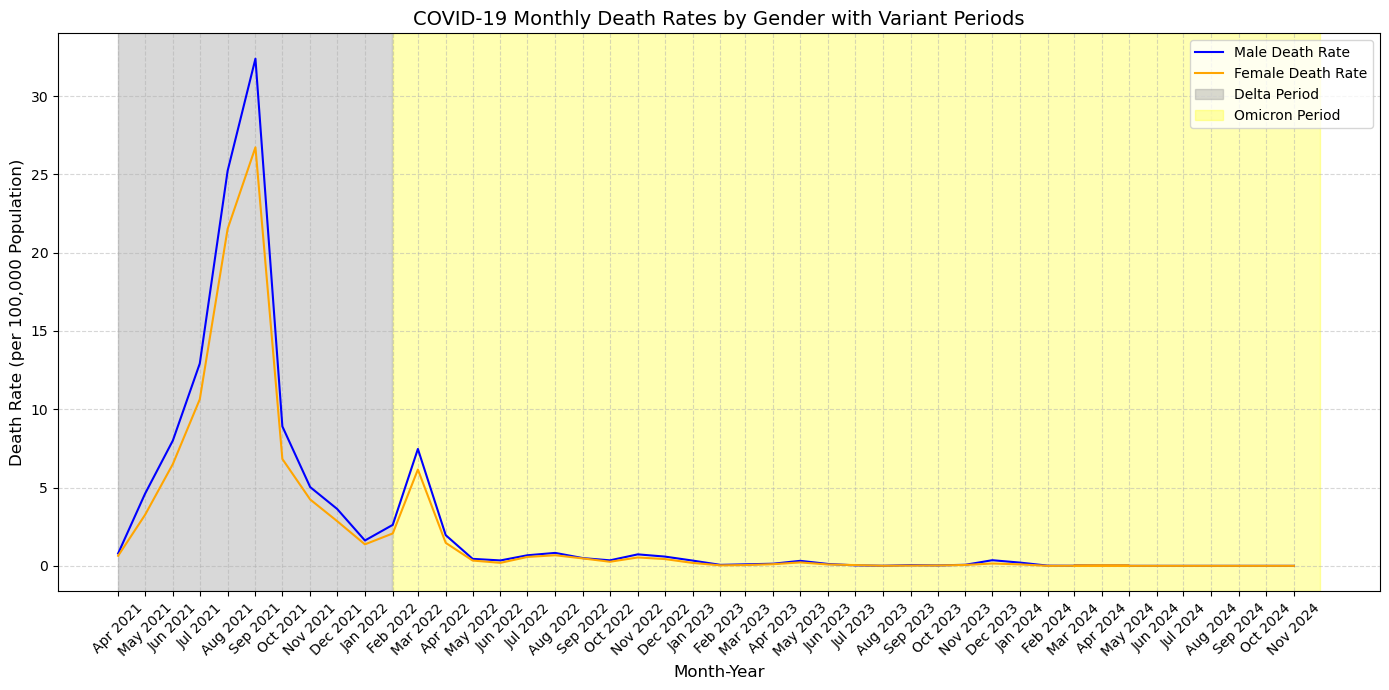

In [20]:
# Descriptive Statistics for Gender
print("Descriptive Statistics for Gender:\n", death_demographic['male'].value_counts(normalize=True))

# Calculate the total number of male deaths and female deaths
male_deaths = death_demographic[death_demographic['male'] == 1].shape[0]
female_deaths = death_demographic[death_demographic['male'] == 0].shape[0]
total_deaths = male_deaths + female_deaths
# Calculate the percentage of male and female deaths
male_percentage = (male_deaths / total_deaths) * 100
female_percentage = (female_deaths / total_deaths) * 100

# Display the results
print(f"Total number of male deaths: {male_deaths} ({male_percentage:.2f}%)")
print(f"Total number of female deaths: {female_deaths} ({female_percentage:.2f}%)")

# Gender distribution 
sizes = [male_deaths, female_deaths]
labels = ['Male', 'Female']
percentages = [male_percentage, female_percentage]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=[f"{label}\n{int(size):,}\n({percent:.2f}%)" for label, size, percent in zip(labels, sizes, percentages)],
    colors=['blue','orange'],
    startangle=90,
    textprops={'fontsize': 14}  # Adjust text size
)
plt.title('Proportion of COVID-19 Deaths by Gender (April 2021 - November 2024)', fontsize=16)
plt.axis('equal')
plt.show()

# Group the data by 'year_month' and calculate the number of male and female deaths
gender_monthly_deaths = death_demographic.groupby('year_month').apply(
    lambda group: pd.Series({
        'Male Deaths': group[group['male'] == 1].shape[0],
        'Female Deaths': group[group['male'] == 0].shape[0]
    })
).reset_index()

# Add a column for total deaths
gender_monthly_deaths['Total Deaths'] = gender_monthly_deaths['Male Deaths'] + gender_monthly_deaths['Female Deaths']

# Extract the 'year' from 'year_month' in gender_monthly_deaths
gender_monthly_deaths['year'] = gender_monthly_deaths['year_month'].dt.year

# List of the missing months and the year
missing_months = ['2024-03', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11']

# Create a DataFrame with these missing months, setting Male and Female Deaths to 0
missing_data1 = pd.DataFrame({
    'year_month': pd.to_datetime(missing_months, format='%Y-%m'),
    'Male Deaths': [0] * len(missing_months),
    'Female Deaths': [0] * len(missing_months),
    'Total Deaths': [0] * len(missing_months),
    'year': [2024] * len(missing_months),  # Set year to 2024 for all rows
})

# Ensure 'year_month' is consistently a Period type in both DataFrames
gender_monthly_deaths['year_month'] = gender_monthly_deaths['year_month'].astype('period[M]')
missing_data1['year_month'] = missing_data1['year_month'].astype('period[M]')

# Merge this missing data with gender_monthly_deaths
gender_monthly_deaths = pd.concat([gender_monthly_deaths, missing_data1], ignore_index=True)

# Display the gender monthly deaths
print("Gender monthly deaths:\n", gender_monthly_deaths)

# Merge gender population data with gender_monthly_deaths on 'year'
merged_gender_data = gender_monthly_deaths.merge(genderpopulation, on='year', how='left')

# Calculate death rate (per 100,000 people) for males and females
merged_gender_data['Male Death Rate'] = (merged_gender_data['Male Deaths'] / merged_gender_data['pop_male']) * 100000
merged_gender_data['Female Death Rate'] = (merged_gender_data['Female Deaths'] / merged_gender_data['pop_female']) * 100000

# Display the results
print(merged_gender_data)

# Save the merged gender data to a CSV file for data storage
merged_gender_data.to_csv('gender_monthly_deaths_with_rates.csv', index=False)

# Convert 'year_month' to datetime for plot
merged_gender_data['year_month'] = merged_gender_data['year_month'].astype(str).astype('datetime64[ns]')

plt.figure(figsize=(14, 7))
# Plot Male Deaths trend
plt.plot(merged_gender_data['year_month'], merged_gender_data['Male Deaths'], label='Male Deaths', color='blue')
# Plot Female Deaths trend
plt.plot(merged_gender_data['year_month'], merged_gender_data['Female Deaths'], label='Female Deaths', color='orange')
# Highlight Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')
# Add labels legend, and title
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('COVID-19 Monthly Deaths by Gender with Variant Periods', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(merged_gender_data['year_month'], merged_gender_data['year_month'].dt.strftime('%b %Y'), rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Monthly Death Rates by Gender with Variant Periods
plt.figure(figsize=(14, 7))
# Plot Male Death Rates trend
plt.plot(merged_gender_data['year_month'], merged_gender_data['Male Death Rate'], label='Male Death Rate', color='blue')
# Plot Female Deaths trend
plt.plot(merged_gender_data['year_month'], merged_gender_data['Female Death Rate'], label='Female Death Rate', color='orange')

# Highlight Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')

# Add labels, legend, and title
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Death Rate (per 100,000 Population)', fontsize=12)
plt.title('COVID-19 Monthly Death Rates by Gender with Variant Periods', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(merged_gender_data['year_month'], merged_gender_data['year_month'].dt.strftime('%b %Y'), rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Descriptive Statistics for Comorbidities:
 comorb
1    0.784002
0    0.215998
Name: proportion, dtype: float64
Number of deaths with comorbidities: 28286 (78.40%)
Number of deaths without comorbidities: 7793 (21.60%)


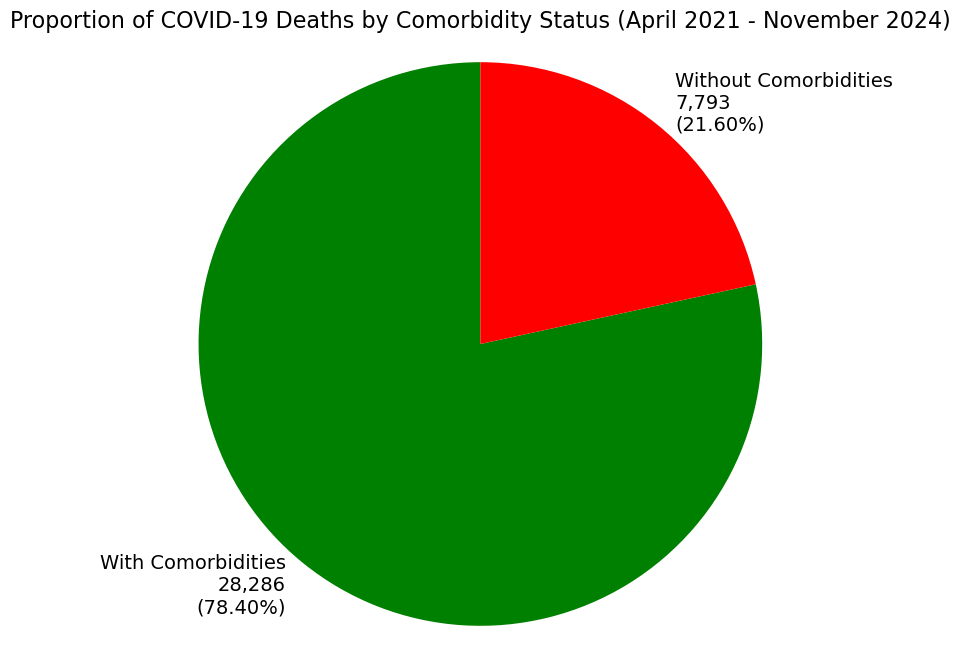

Comorbidity Monthly Deaths:
              year_month  Deaths with comorbdities  \
0               2021-04                       211   
1               2021-05                      1063   
2               2021-06                      1919   
3               2021-07                      2893   
4               2021-08                      5120   
5               2021-09                      7304   
6               2021-10                      2440   
7               2021-11                      1357   
8               2021-12                       951   
9               2022-01                       428   
10              2022-02                       713   
11              2022-03                      1894   
12              2022-04                       479   
13              2022-05                       106   
14              2022-06                        72   
15              2022-07                       169   
16              2022-08                       220   
17              2

C:\Users\User\AppData\Local\Temp\ipykernel_10236\2627244320.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  comorb_monthly_deaths = death_demographic.groupby('year_month').apply(


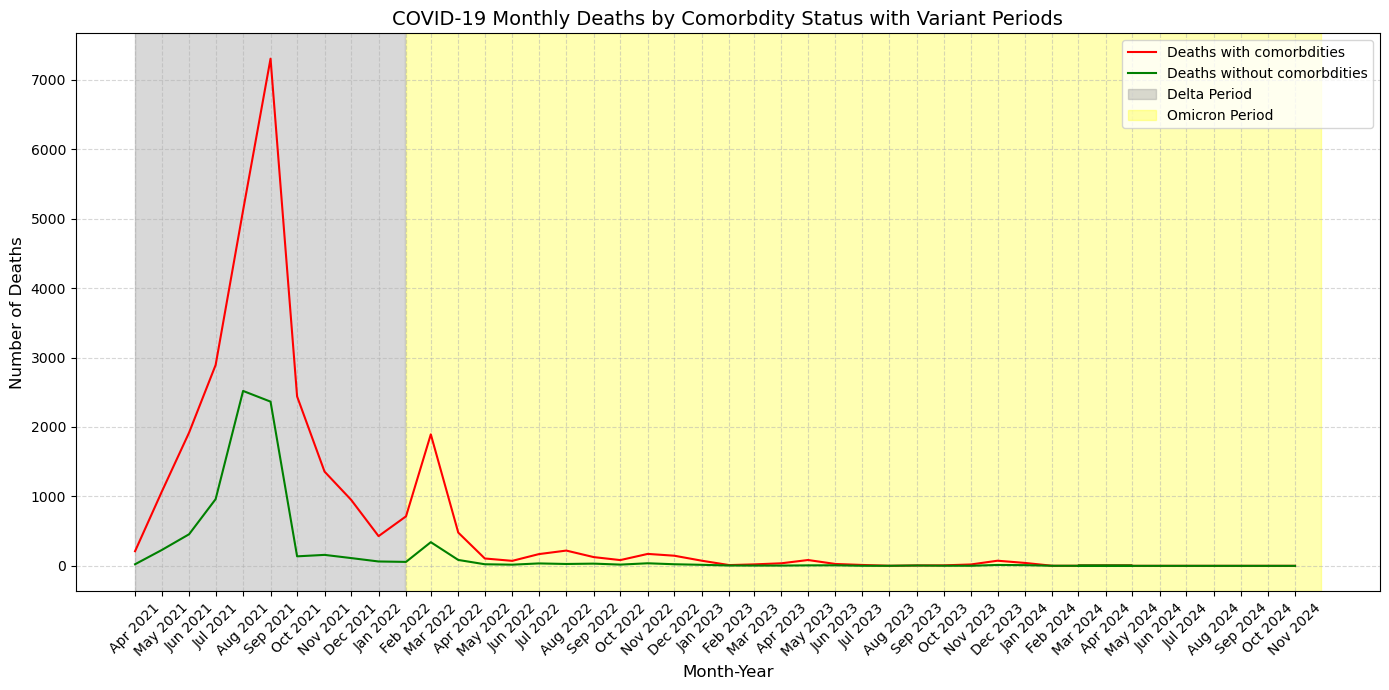

In [33]:
# Descriptive Statistics for Comorbidity Status
print("Descriptive Statistics for Comorbidities:\n", death_demographic['comorb'].value_counts(normalize=True))

# Calculate the number of deaths with and without comorbidities
deaths_with_comorb = death_demographic[death_demographic['comorb'] == 1].shape[0]
deaths_without_comorb = death_demographic[death_demographic['comorb'] == 0].shape[0]

# Calculate the percentage of deaths with and without comorbidities
comorb_percentage = ( deaths_with_comorb / total_deaths) * 100
nocomorb_percentage = ( deaths_without_comorb / total_deaths) * 100

# Display the results
print(f"Number of deaths with comorbidities: {deaths_with_comorb} ({comorb_percentage:.2f}%)")
print(f"Number of deaths without comorbidities: {deaths_without_comorb} ({nocomorb_percentage:.2f}%)")

# Comorbidity distribution 
sizes = [deaths_with_comorb, deaths_without_comorb]
labels = ['With Comorbidities', 'Without Comorbidities']
percentages = [comorb_percentage, nocomorb_percentage]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=[f"{label}\n{int(size):,}\n({percent:.2f}%)" for label, size, percent in zip(labels, sizes, percentages)],
    colors=['green','red'],
    startangle=90,
    textprops={'fontsize': 14}  # Adjust text size
)
# Add title
plt.title('Proportion of COVID-19 Deaths by Comorbidity Status (April 2021 - November 2024)', fontsize=16)
# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')
# Display the plot
plt.show()

# Group the data by 'year_month' and calculate the number of deaths by comorbidity status
comorb_monthly_deaths = death_demographic.groupby('year_month').apply(
    lambda group: pd.Series({
        'Deaths with comorbdities': group[group['comorb'] == 1].shape[0],
        'Deaths without comorbdities': group[group['comorb'] == 0].shape[0]
    })
).reset_index()

# Add a column for total deaths
comorb_monthly_deaths['Total Deaths'] = comorb_monthly_deaths['Deaths with comorbdities'] + comorb_monthly_deaths['Deaths without comorbdities']

# List of the missing months and the year
missing_months = ['2024-03', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11']

# Create a DataFrame with these missing months, setting All Deaths to 0
missing_data2 = pd.DataFrame({
    'year_month': pd.to_datetime(missing_months, format='%Y-%m'),
    'Deaths with comorbdities': [0] * len(missing_months),
    'Deaths without comorbdities': [0] * len(missing_months),
    'Total Deaths': [0] * len(missing_months)
})

# Merge this missing data with gender_monthly_deaths
comorb_monthly_deaths = pd.concat([comorb_monthly_deaths, missing_data2], ignore_index=True)

# Display the comorbidity monthly death
print("Comorbidity Monthly Deaths:\n", comorb_monthly_deaths)

# Save comorb_monthly_deaths to a CSV file for data storage
comorb_monthly_deaths.to_csv('comorb_monthly_deaths.csv', index=False)

# Line Graph: Monthly Death Trends by Comorbidity Status with Variant Periods
# Convert 'year_month' to datetime for plot
comorb_monthly_deaths['year_month'] = comorb_monthly_deaths['year_month'].astype(str).astype('datetime64[ns]')

plt.figure(figsize=(14, 7))
# Plot the trend for Deaths with comorbdities
plt.plot(comorb_monthly_deaths['year_month'], comorb_monthly_deaths['Deaths with comorbdities'], label='Deaths with comorbdities', color='red')

# Plot the trend for Deaths without comorbdities
plt.plot(comorb_monthly_deaths['year_month'], comorb_monthly_deaths['Deaths without comorbdities'], label='Deaths without comorbdities', color='green')

# Highlight Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')

# Add labels, legend, and title
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('COVID-19 Monthly Deaths by Comorbdity Status with Variant Periods', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(comorb_monthly_deaths['year_month'], comorb_monthly_deaths['year_month'].dt.strftime('%b %Y'), rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()